In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import scipy.stats as stats
import numpy as np
from google.colab import auth
from googleapiclient.discovery import build

In [63]:
auth.authenticate_user()

In [64]:
spreadsheet_id = '1UMrEnuuaqlNvbjAnz97ZNIRUP-N9w-1g_5lJ6wl1dok'
service = build('sheets', 'v4')
range_name = 'Sheet1'

result = service.spreadsheets().values().get(spreadsheetId=spreadsheet_id, range=range_name).execute()
values = result.get('values', [])

In [65]:
if values:
    df = pd.DataFrame(values[1:], columns=values[0])
    numeric_columns = ['Temperature']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [66]:
df['Date & Time'] = pd.to_datetime(df['Date & Time'], format='%m/%d/%Y_%H:%M:%S')
df['Hour'] = df['Date & Time'].dt.hour
df['Day_of_Week'] = df['Date & Time'].dt.day_name()


end_date = df['Date & Time'].max()
start_date = end_date - pd.DateOffset(weeks=2)
filtered_data = df[(df['Date & Time'] >= start_date) & (df['Date & Time'] <= end_date)]

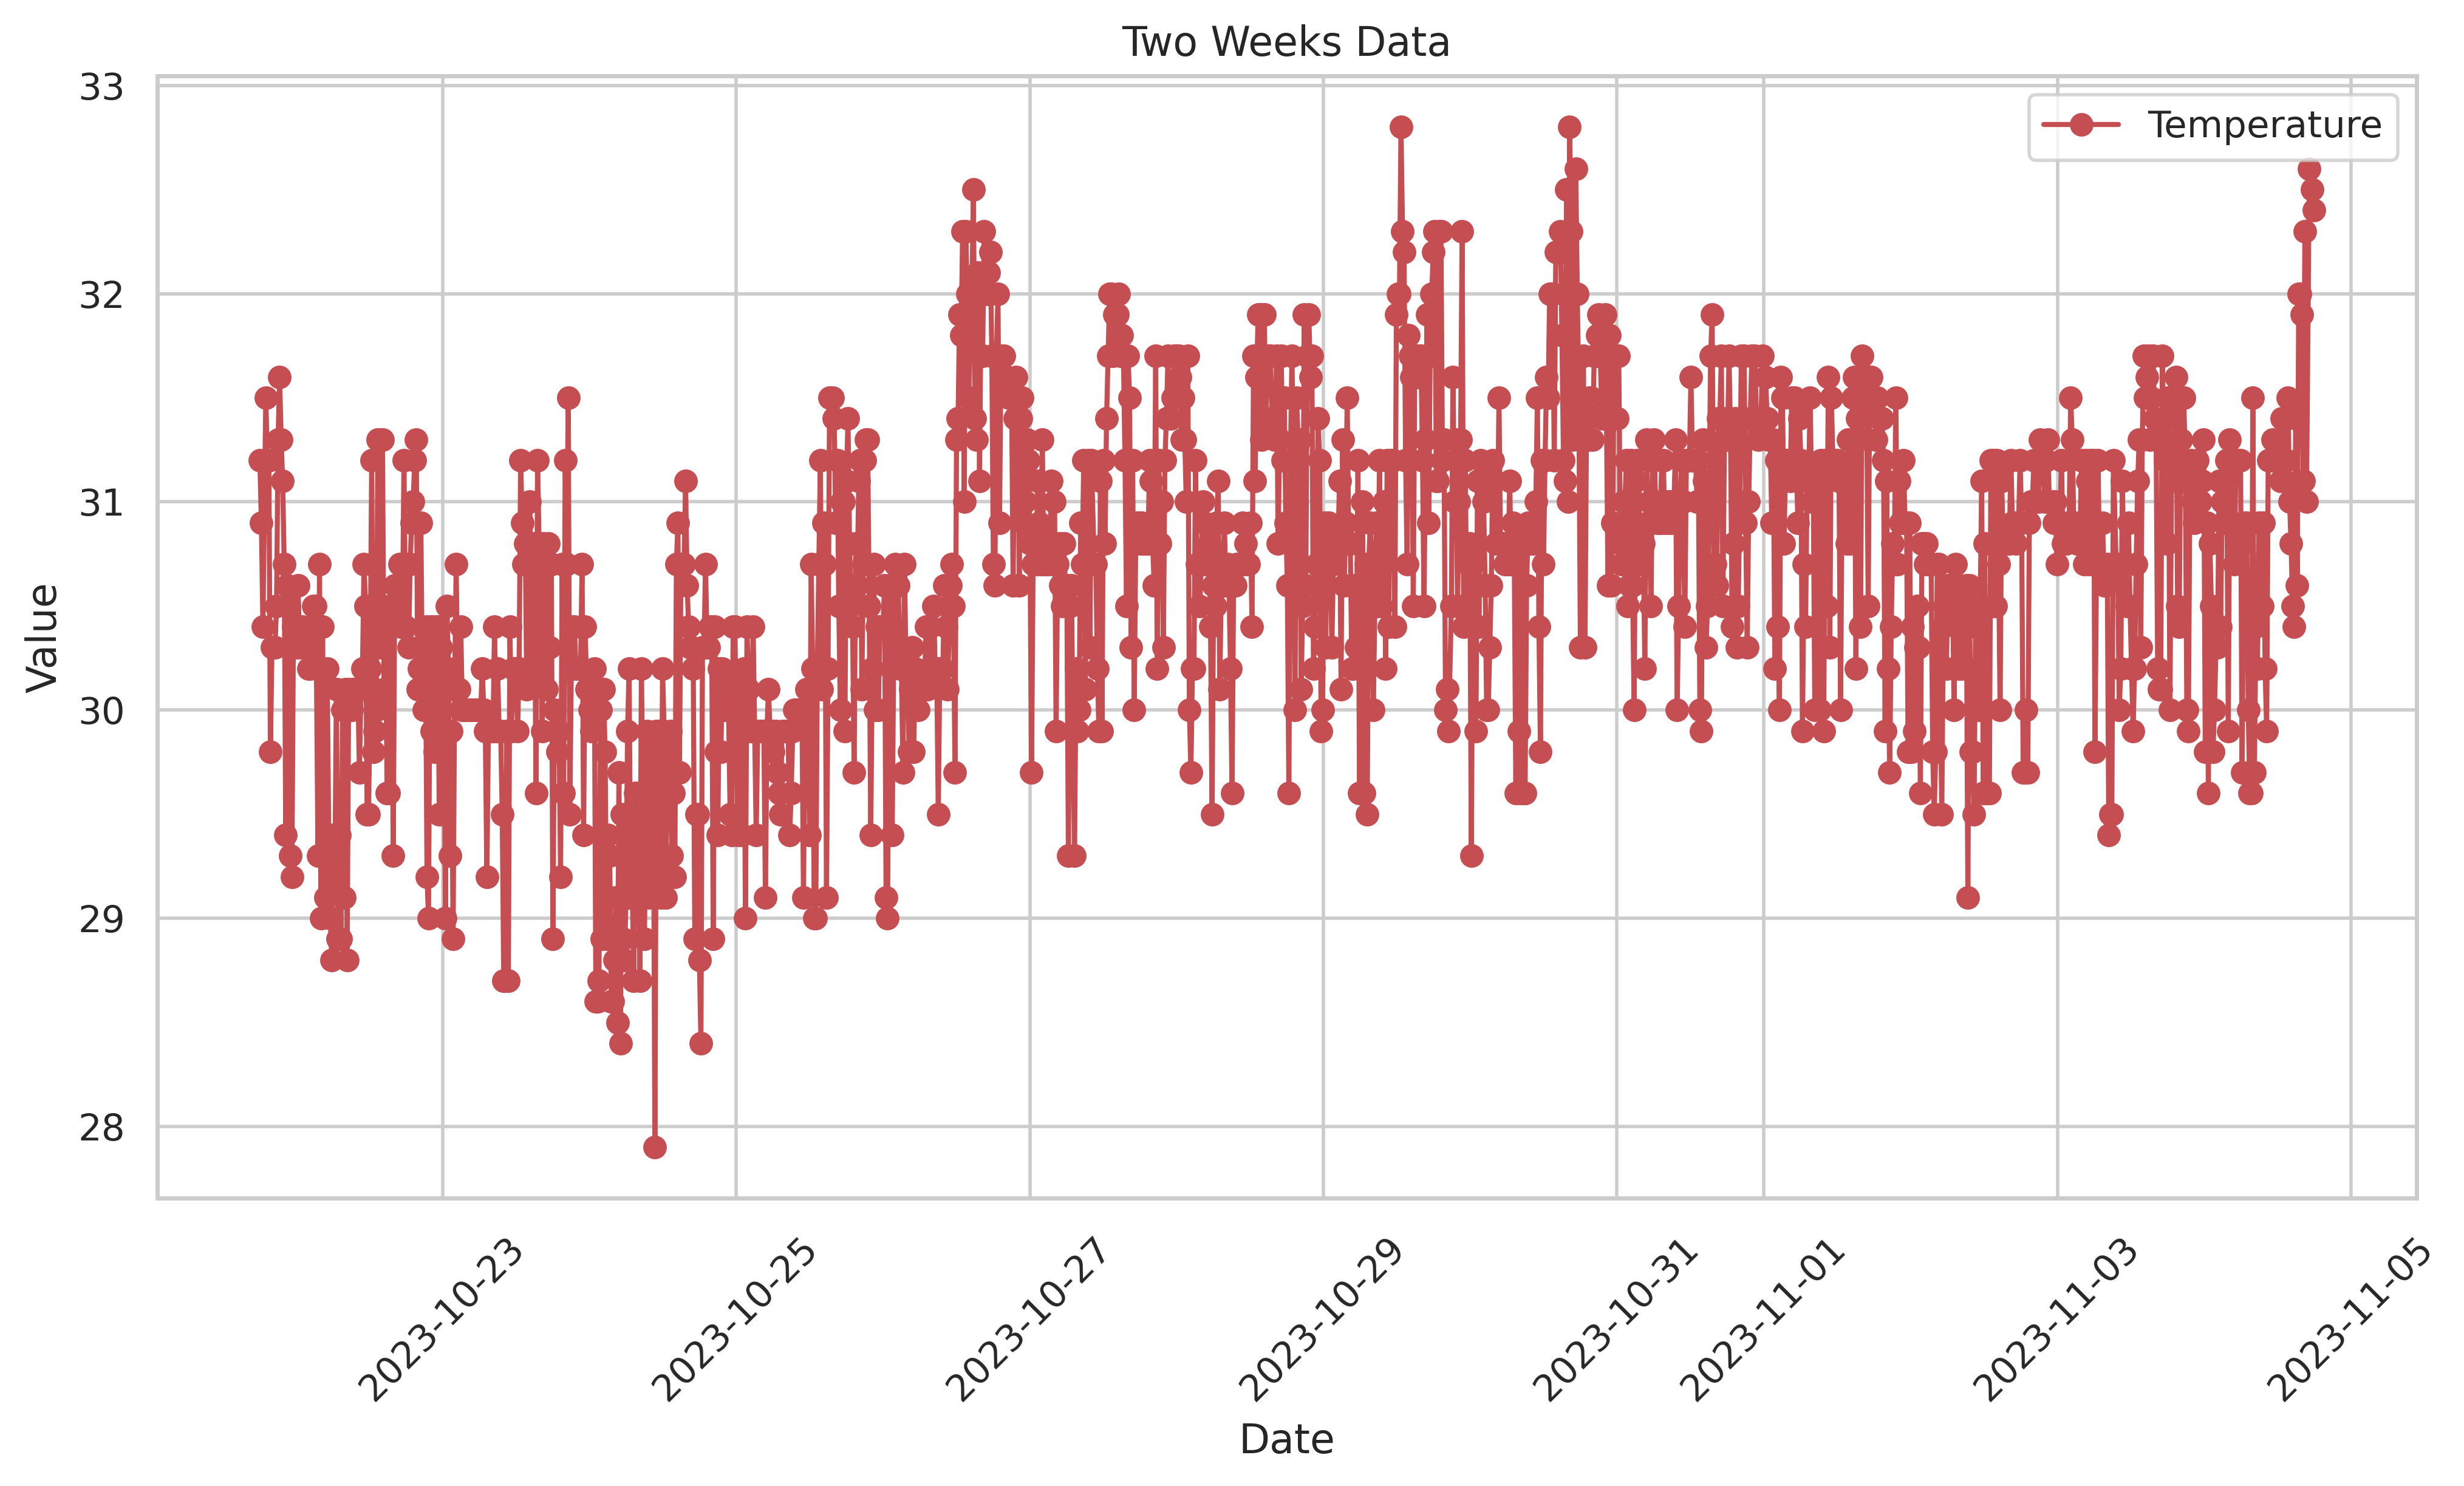

In [67]:
plt.figure(figsize=(12, 6), dpi=400)
sns.set(style='whitegrid')
plt.plot(filtered_data['Date & Time'], filtered_data['Temperature'], label='Temperature', marker='o', linestyle='-', color='r')
plt.title('Two Weeks Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [68]:
df['Date & Time'] = pd.to_datetime(df['Date & Time'], format='%m/%d/%Y_%H:%M:%S')

end_date = df['Date & Time'].max()
start_date = end_date - pd.DateOffset(weeks=2)
filtered_data = df[(df['Date & Time'] >= start_date) & (df['Date & Time'] <= end_date)]

# Calculate statistical summary for Temperature
temperature_summary = filtered_data['Temperature'].describe()

print("\nStatistical Summary for Temperature:")
print(temperature_summary)

# Calculate central tendencies and variance according to time of day
hourly_mean_temperature = filtered_data.groupby('Hour')['Temperature'].mean()
hourly_var_temperature = filtered_data.groupby('Hour')['Temperature'].var()

print("\nCentral Tendencies by Hour of the Day (Temperature):")
print(hourly_mean_temperature)
print("\nVariance by Hour of the Day (Temperature):")
print(hourly_var_temperature)

# Calculate central tendencies and variance according to the day of the week
weekly_mean_temperature = filtered_data.groupby('Day_of_Week')['Temperature'].mean()
weekly_var_temperature = filtered_data.groupby('Day_of_Week')['Temperature'].var()

print("\nCentral Tendencies by Day of the Week (Temperature):")
print(weekly_mean_temperature)
print("\nVariance by Day of the Week (Temperature):")
print(weekly_var_temperature)



Statistical Summary for Temperature:
count    1328.000000
mean       30.651130
std         0.756453
min        27.900000
25%        30.100000
50%        30.700000
75%        31.200000
max        32.800000
Name: Temperature, dtype: float64

Central Tendencies by Hour of the Day (Temperature):
Hour
0     30.465455
1     30.410714
2     30.469643
3     30.473214
4     30.396364
5     30.346429
6     30.321429
7     30.212727
8     30.228571
9     30.300000
10    30.356604
11    30.525000
12    30.810714
13    31.041071
14    31.139286
15    31.142857
16    31.088889
17    31.083636
18    30.794444
19    30.836364
20    30.805556
21    30.867857
22    30.835714
23    30.674545
Name: Temperature, dtype: float64

Variance by Hour of the Day (Temperature):
Hour
0     0.466377
1     0.543519
2     0.296698
3     0.478360
4     0.524431
5     0.538169
6     0.364260
7     0.455205
8     0.340987
9     0.338519
10    0.560581
11    0.392455
12    0.755156
13    0.654464
14    0.560610
15    0.4

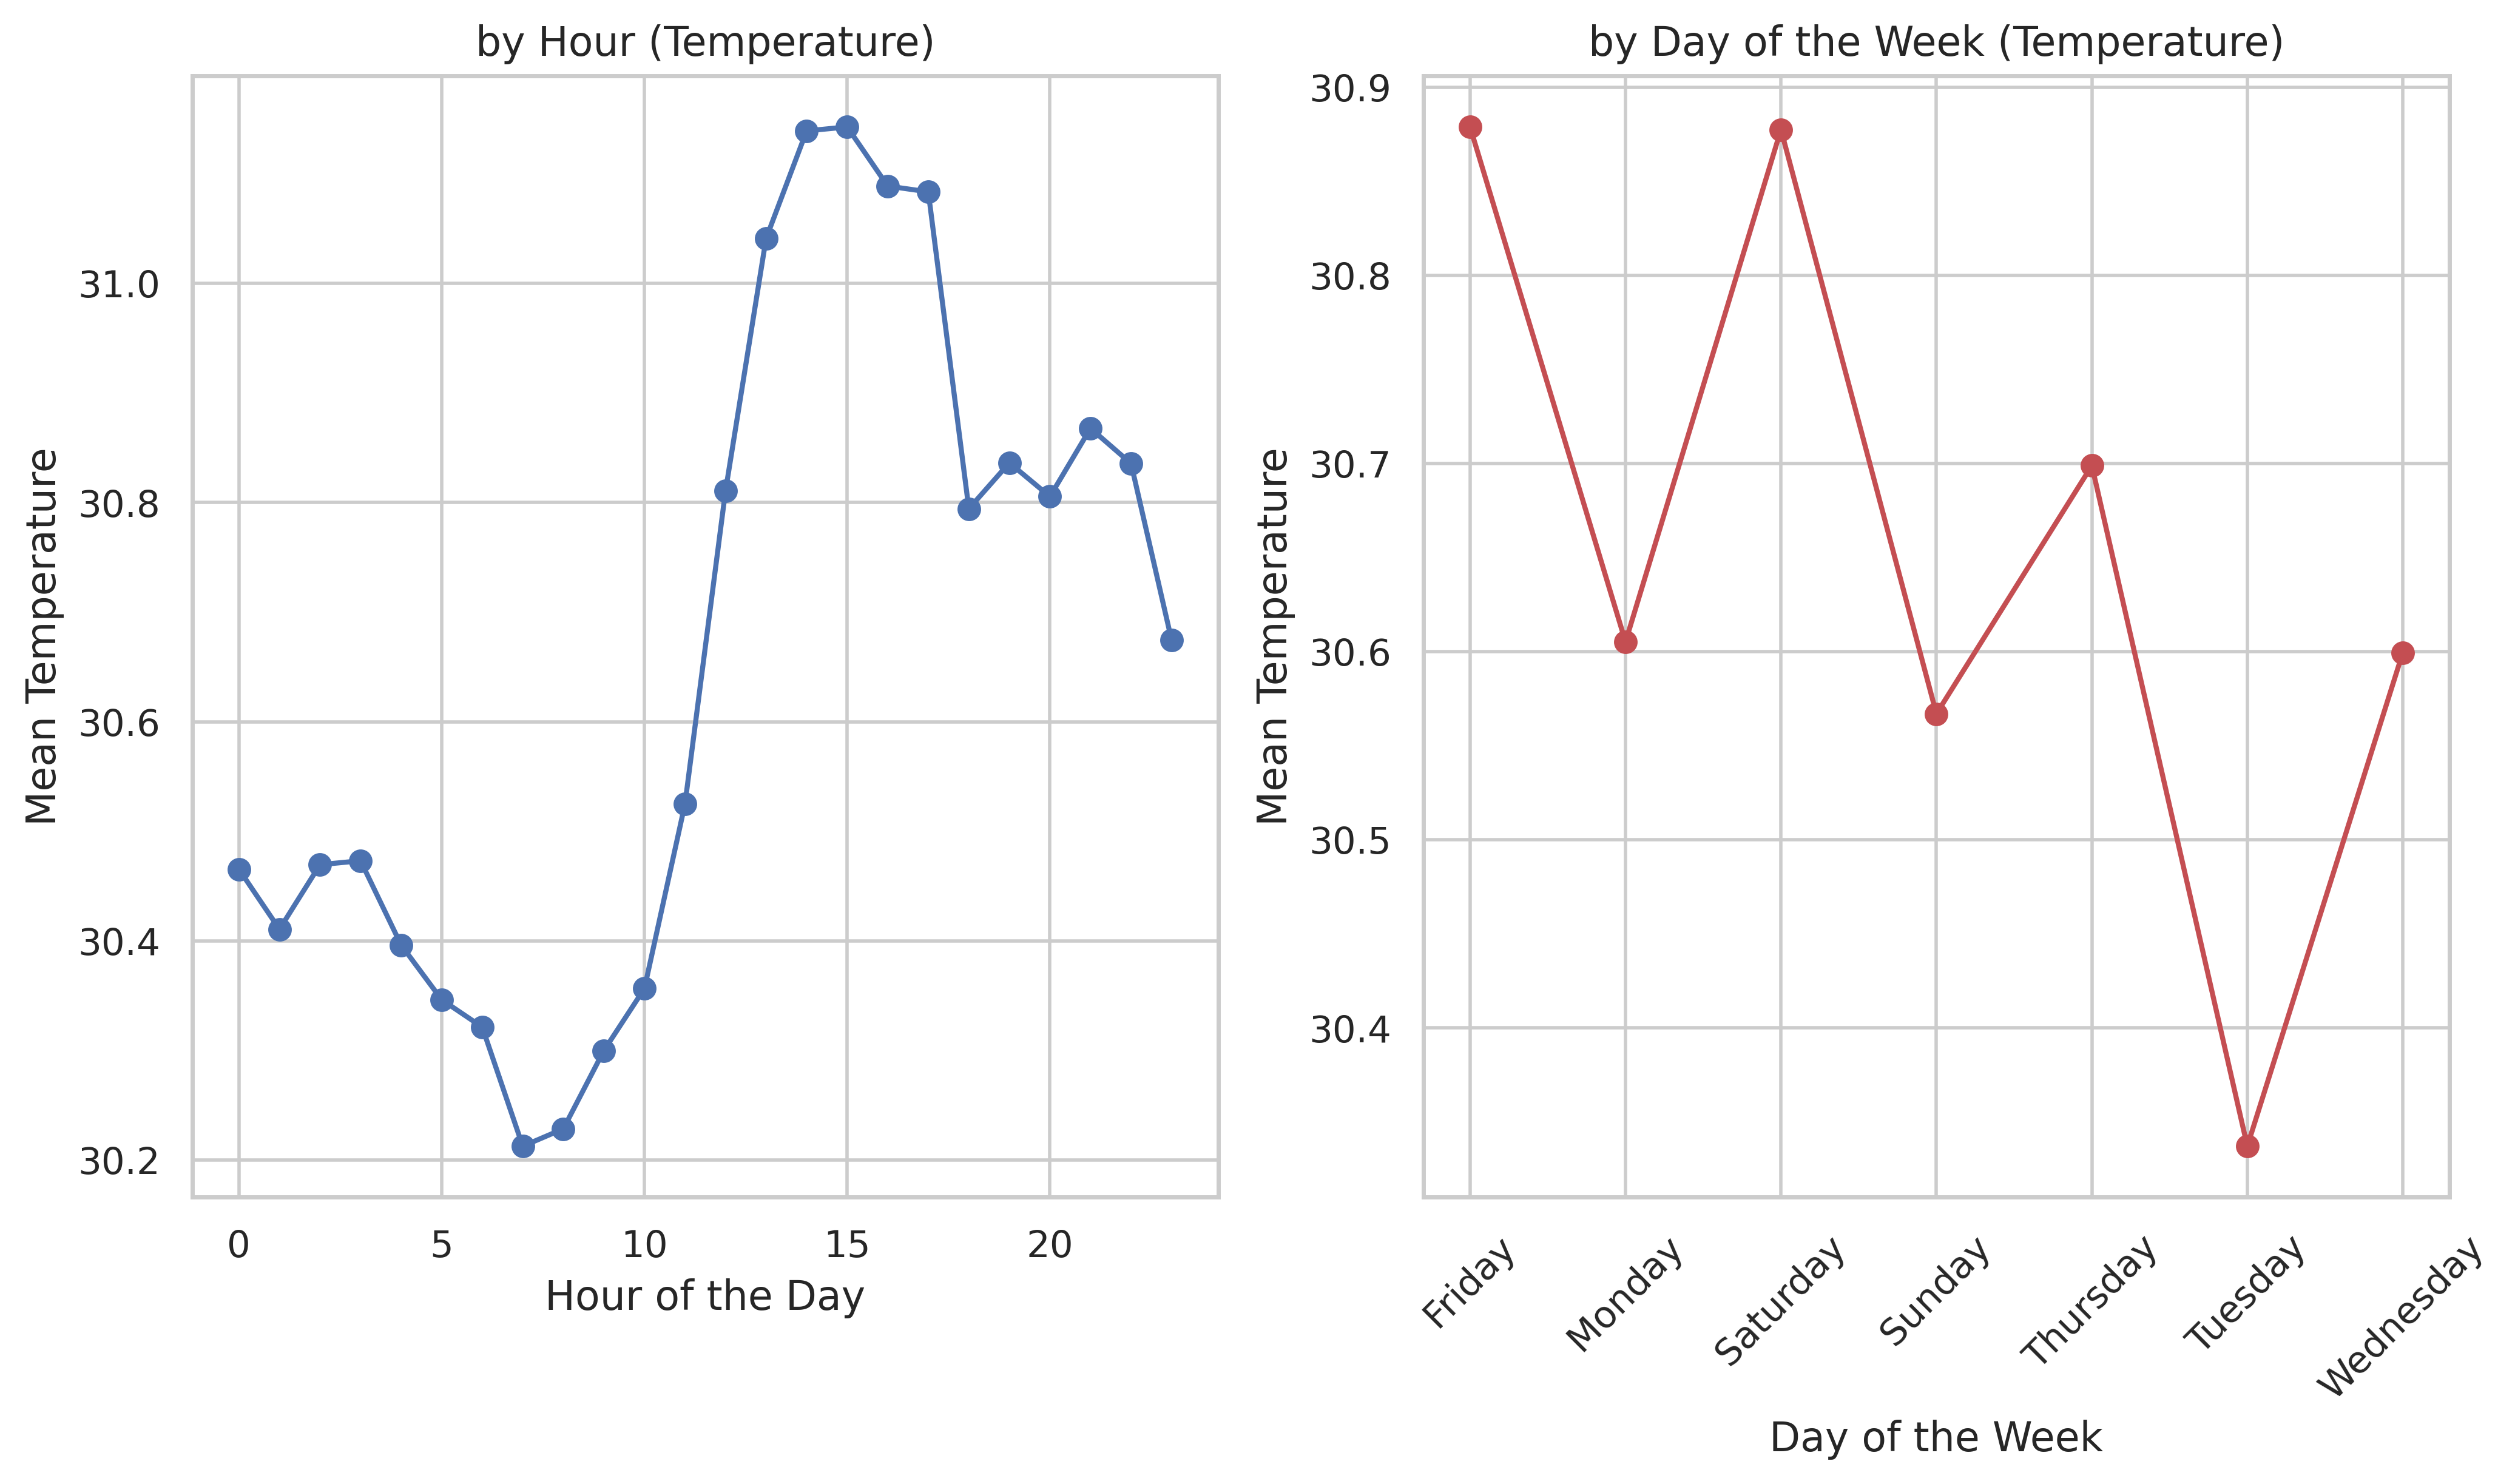

In [69]:
# Calculate central tendencies according to time of day
hourly_mean_temperature = filtered_data.groupby('Hour')['Temperature'].mean()

# Calculate central tendencies according to the day of the week
weekly_mean_temperature = filtered_data.groupby('Day_of_Week')['Temperature'].mean()

# Create line graphs for Temperature
plt.figure(figsize=(12, 6), dpi=400)
plt.subplot(1, 2, 1)
plt.plot(hourly_mean_temperature.index, hourly_mean_temperature, marker='o', linestyle='-', color='b')
plt.title("by Hour (Temperature)")
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Temperature")
plt.grid(True)  # Add grid lines
plt.subplot(1, 2, 2)
plt.plot(weekly_mean_temperature.index, weekly_mean_temperature, marker='o', linestyle='-', color='r')
plt.title("by Day of the Week (Temperature)")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Temperature")
plt.xticks(rotation=45)
plt.grid(True)  # Add grid lines

# Calculate general mean Temperature (from raw data)
general_mean_temperature = filtered_data['Temperature'].mean()

plt.show()


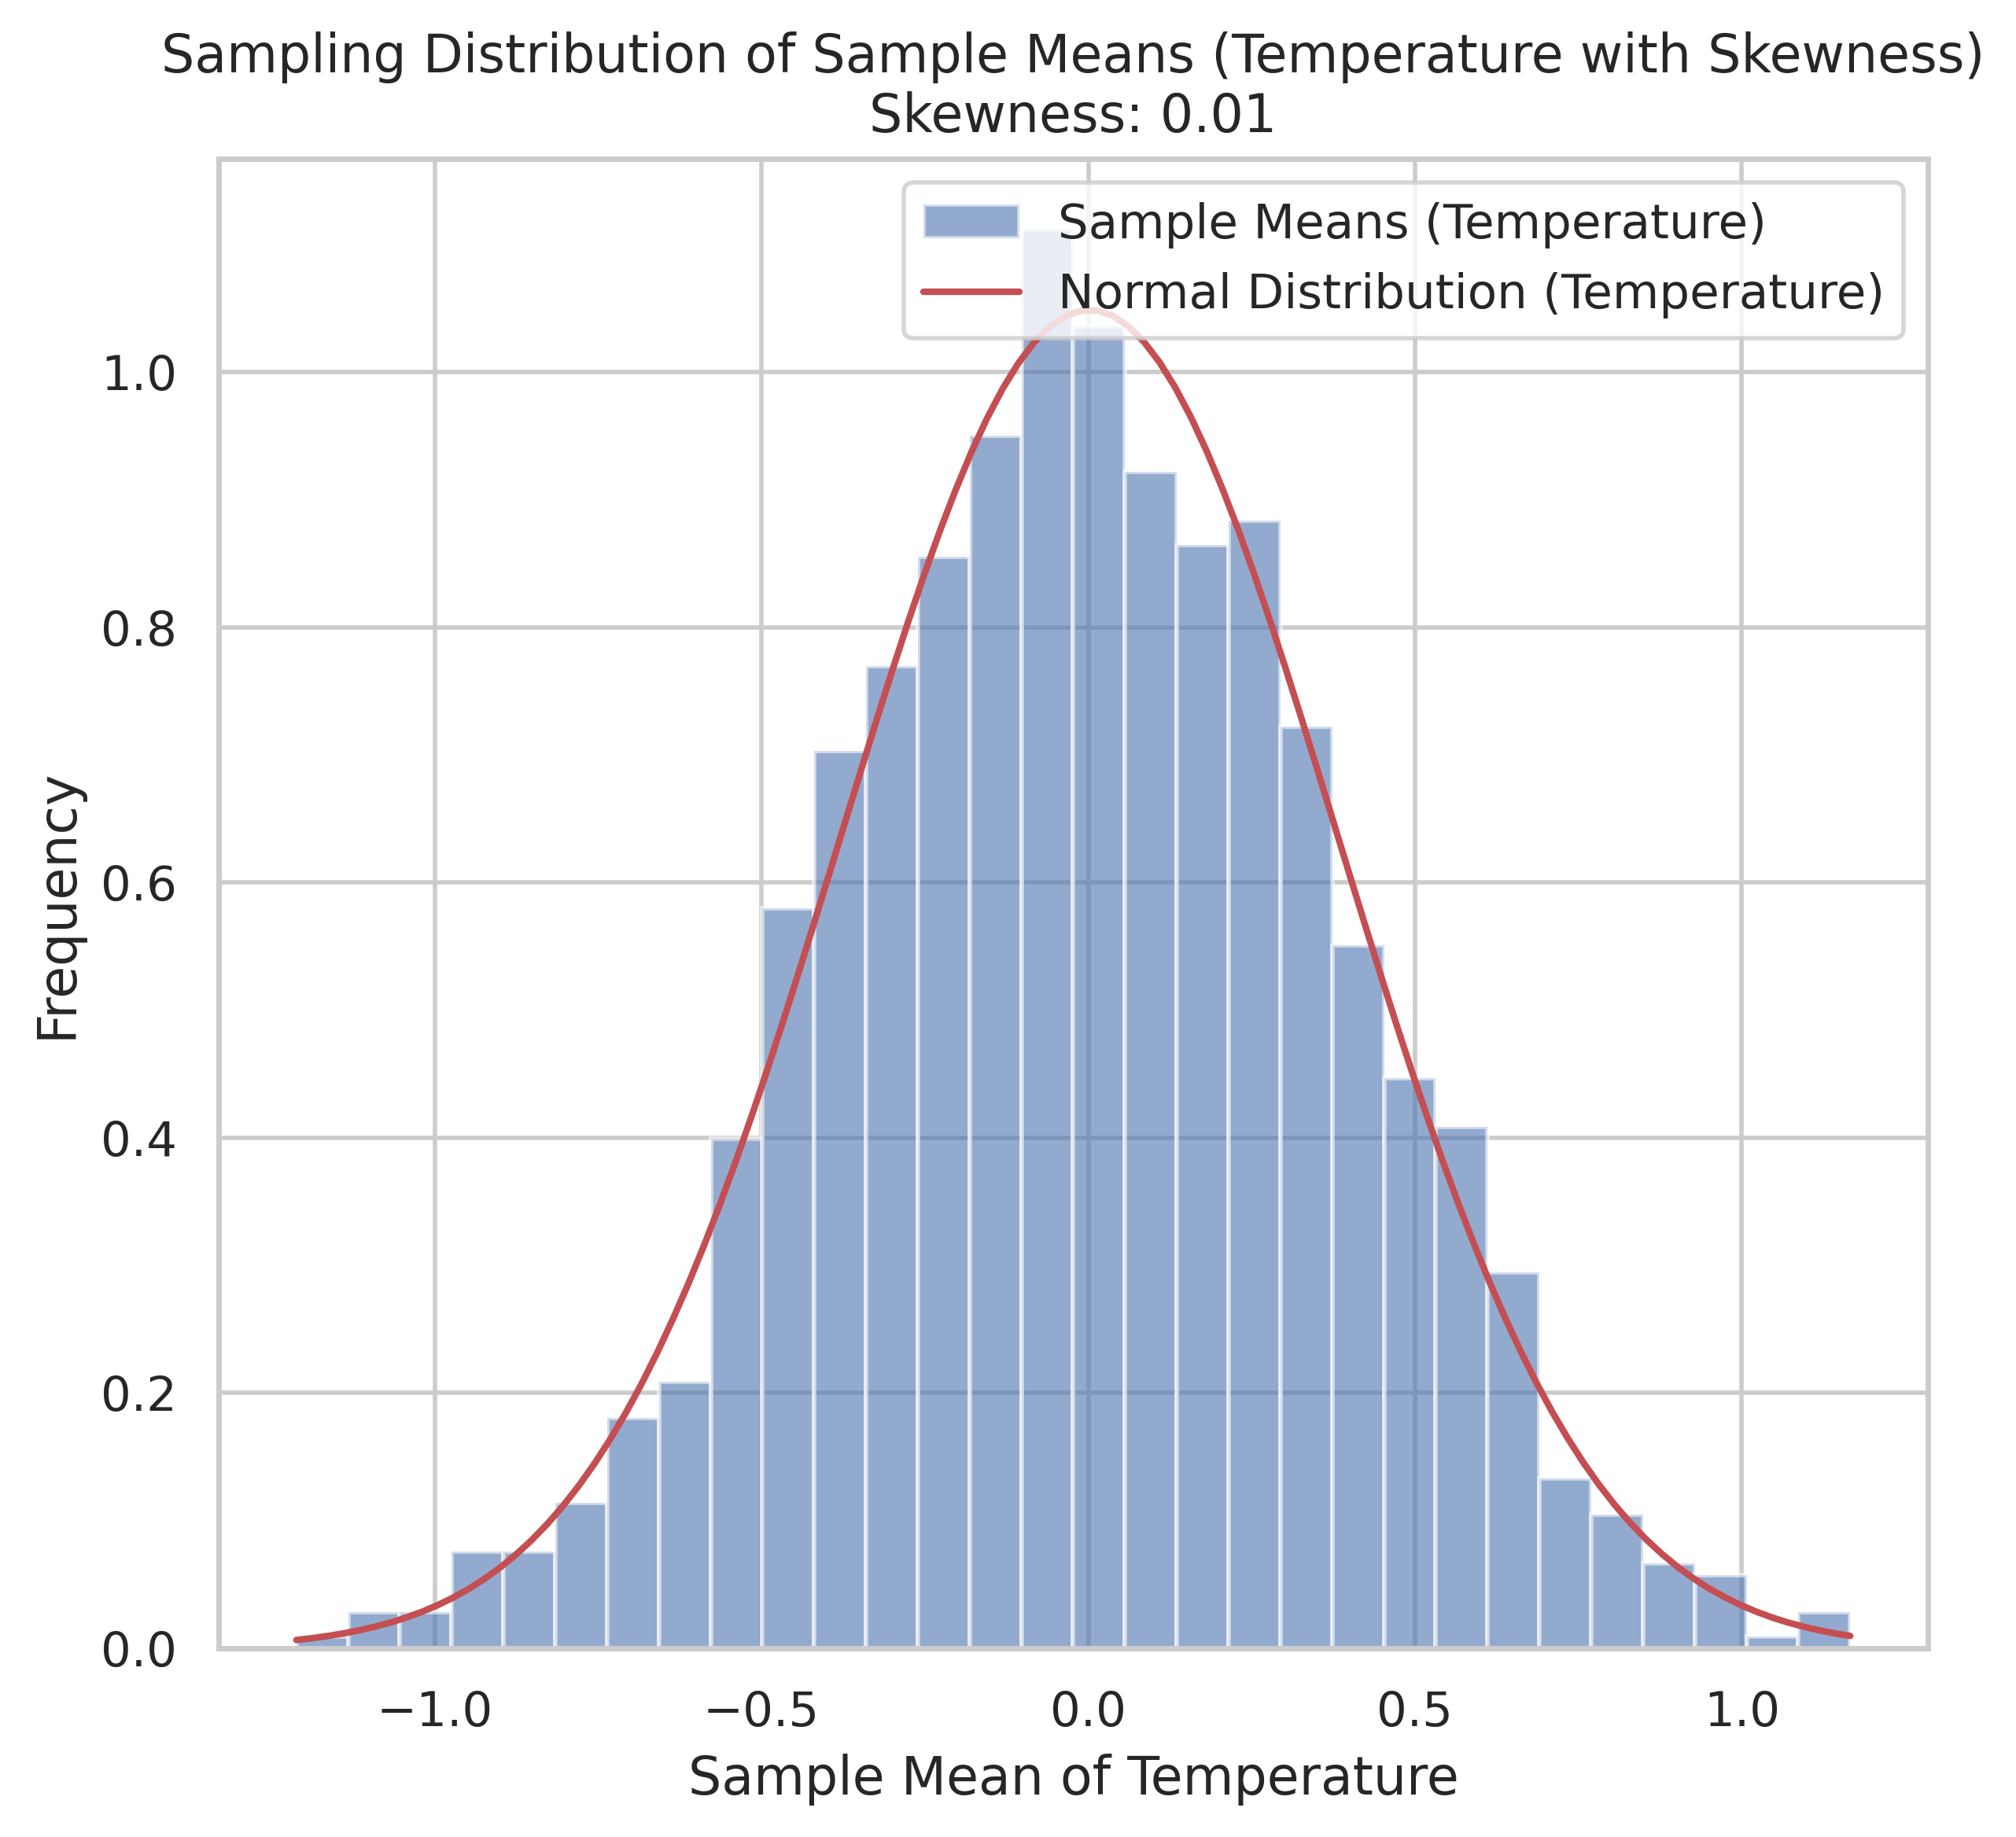

In [70]:
num_samples = 1328
sample_size = 30

sample_means_temperature = []
temperature_skew = 2.0


for _ in range(num_samples):
    sample_temperature = np.random.normal(0, 1, size=sample_size)
    sample_temperature = temperature_skew * sample_temperature + np.random.normal(0, 0.5, size=sample_size)
    sample_mean_temperature = np.mean(sample_temperature)
    sample_means_temperature.append(sample_mean_temperature)


skewness_temperature = stats.skew(sample_means_temperature)


plt.figure(figsize=(12, 6), dpi=400)
plt.subplot(1, 2, 1)
plt.hist(sample_means_temperature, bins=30, density=True, alpha=0.6, color='b', label='Sample Means (Temperature)')
plt.xlabel('Sample Mean of Temperature')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Sample Means (Temperature with Skewness)\nSkewness: {:.2f}'.format(skewness_temperature))
mu_temp, std_temp = np.mean(sample_means_temperature), np.std(sample_means_temperature)
x_temp = np.linspace(min(sample_means_temperature), max(sample_means_temperature), 100)
pdf_temp = stats.norm.pdf(x_temp, mu_temp, std_temp)
plt.plot(x_temp, pdf_temp, 'r-', label='Normal Distribution (Temperature)')
plt.legend()

plt.tight_layout()
plt.show()


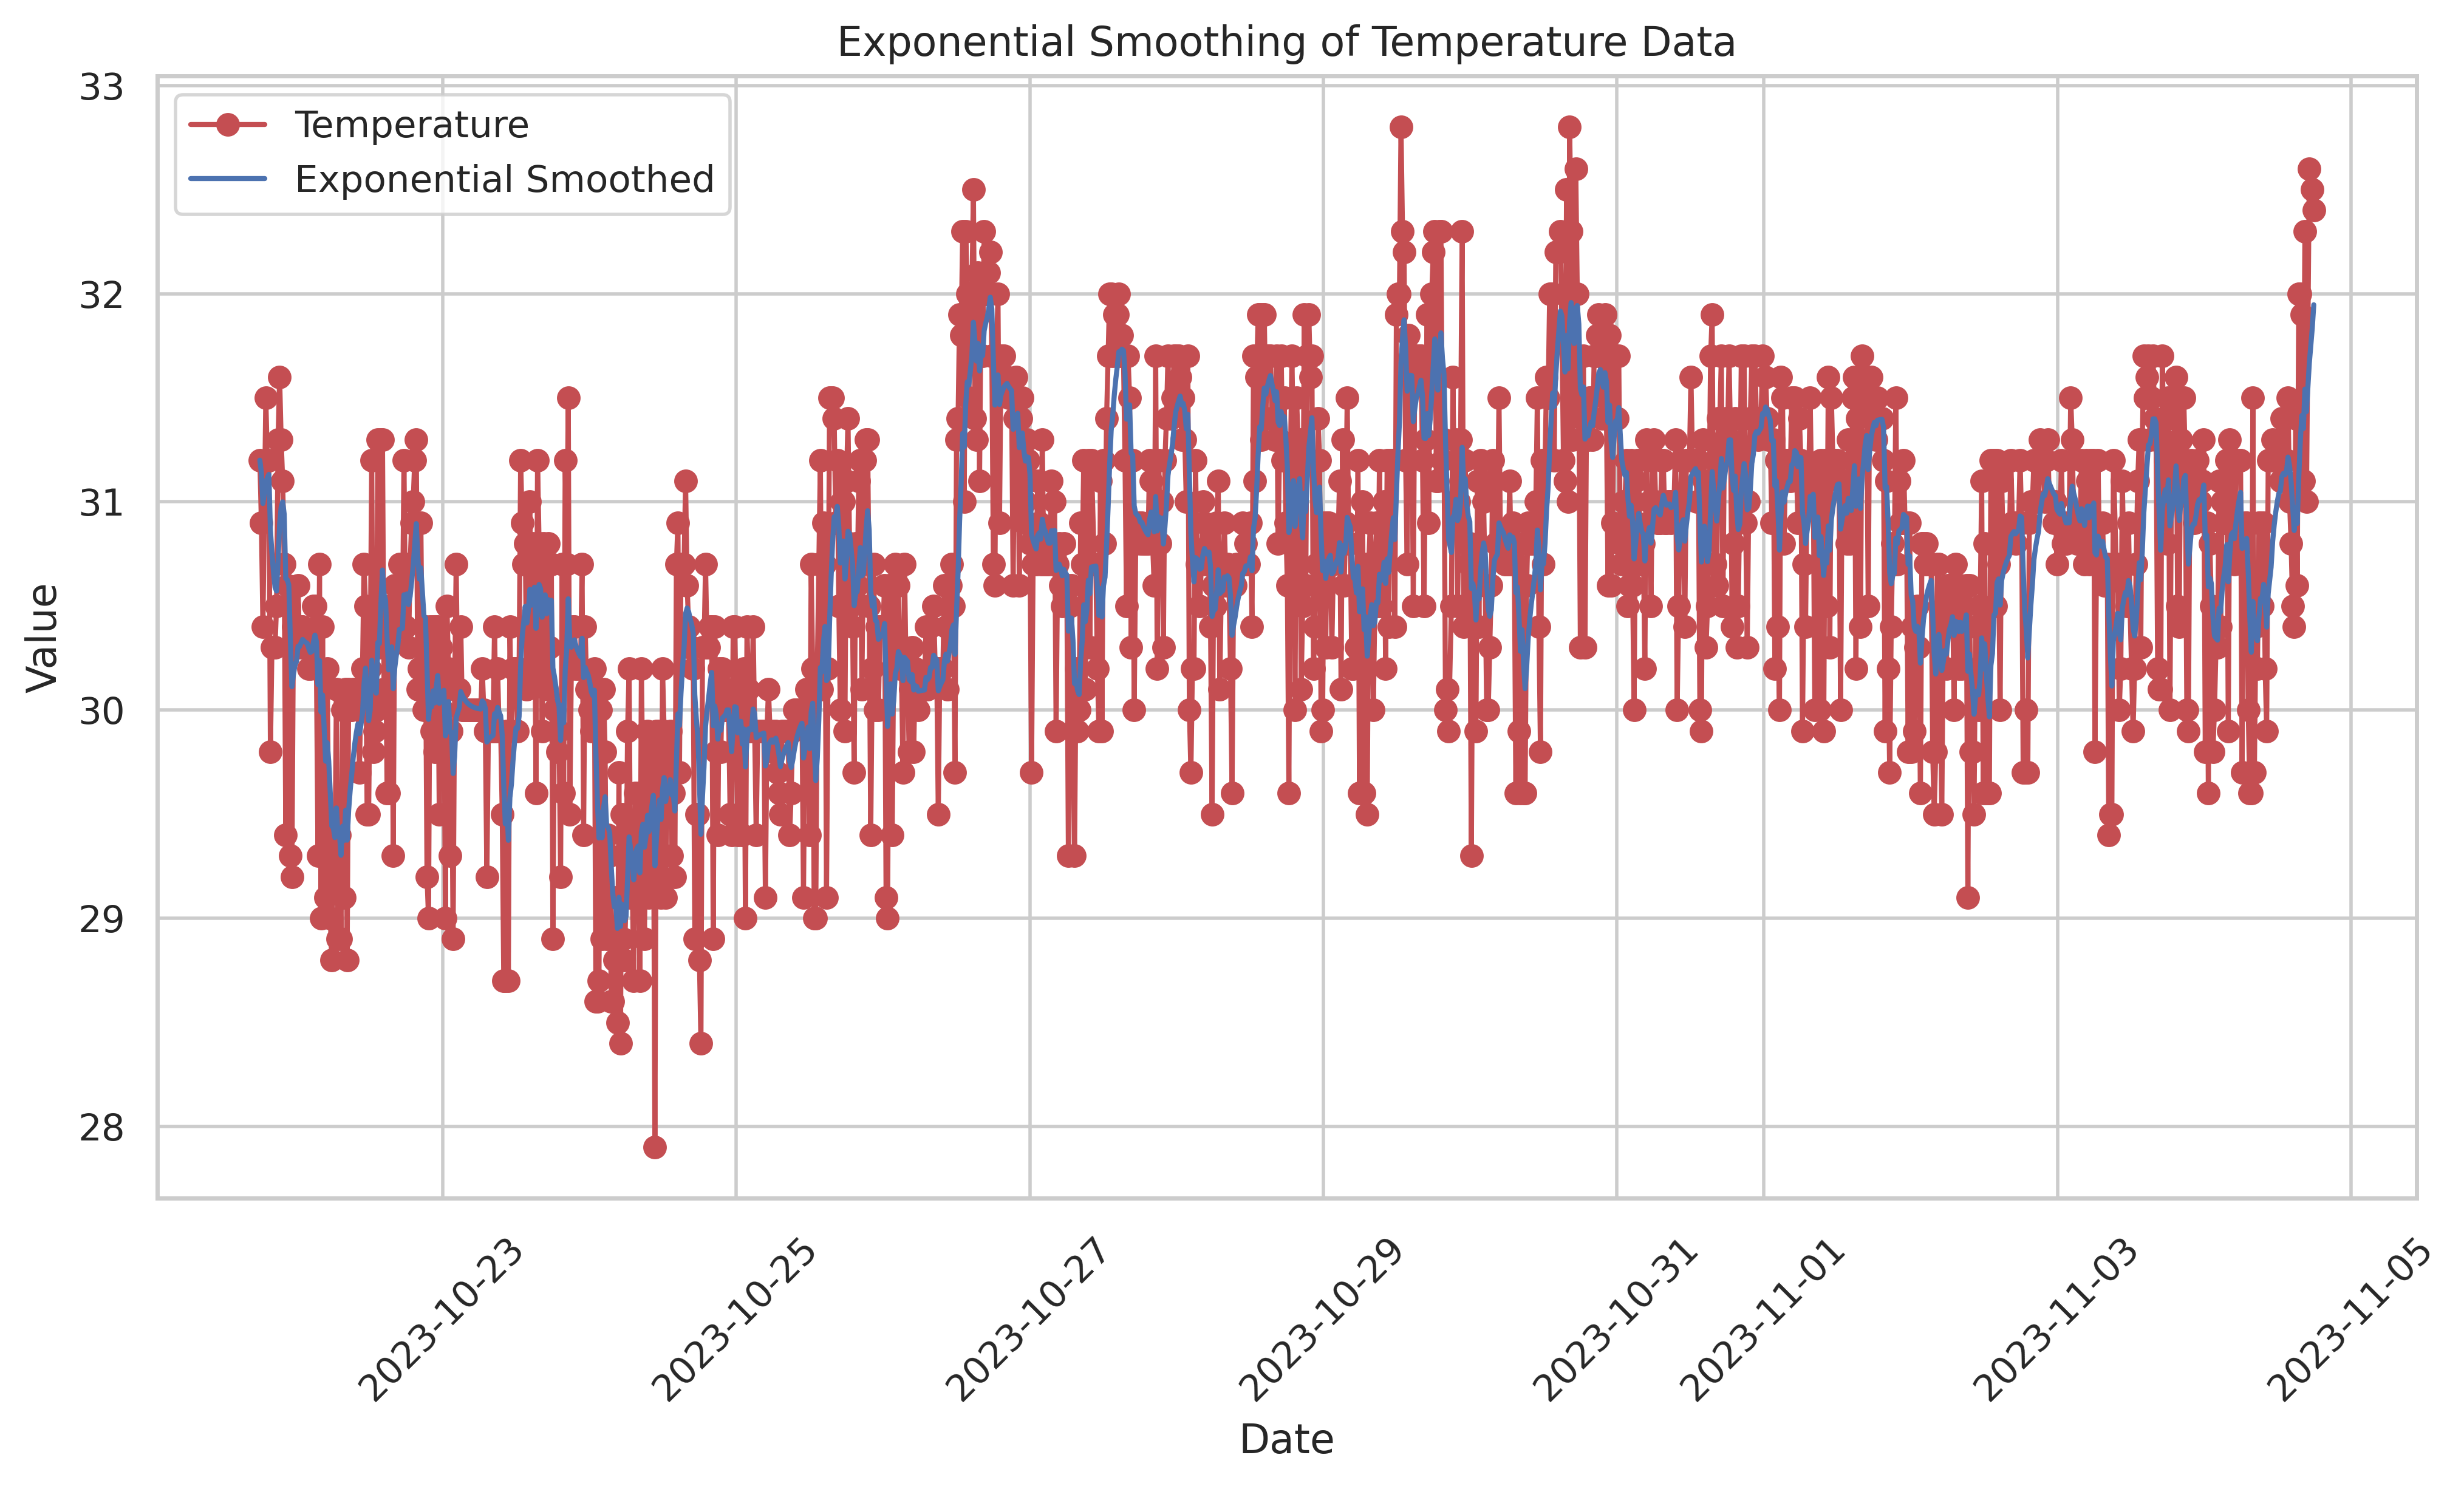

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = filtered_data.copy()

# Alpha value (smoothing parameter)
alpha = 0.2

# For exponential smoothing
filtered_data['Exponential_Smoothed'] = filtered_data['Temperature'].ewm(alpha=alpha, adjust=False).mean()

# Plot the original data and the exponentially smoothed data
plt.figure(figsize=(12, 6), dpi=400)
plt.plot(filtered_data['Date & Time'], filtered_data['Temperature'], label='Temperature', marker='o', linestyle='-', color='r')
plt.plot(filtered_data['Date & Time'], filtered_data['Exponential_Smoothed'], label='Exponential Smoothed', linestyle='-', color='b')
plt.title('Exponential Smoothing of Temperature Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()